# :)
Script Name: GNSZ_2  
Author: Fatemeh Delavari  
Version: 1.0 (09/30/2024)  
Description: Performs graph analysis on an epileptic EEG containing generalized non-specific seizure

In [44]:
import mne
import os
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from scipy.signal import hilbert, butter, filtfilt

In [45]:
# Specify the path to your EDF file
# 1
file_name = 'aaaaajqo_s020_t001.edf'
folder_path = 'C:/Users/Atena/Documents/tuh_eeg_edf_files'
file_path = os.path.join(folder_path, file_name)

# Read the EDF file
raw = mne.io.read_raw_edf(file_path, preload=True)

# Get basic information
print(raw.info)
print(raw.ch_names)

sampfreq = int(raw.info['sfreq'])

# Extract signal data
data, times = raw[:]

print(f"Data shape: {data.shape}")
print(f"Times shape: {times.shape}")

Extracting EDF parameters from C:\Users\Atena\Documents\tuh_eeg_edf_files\aaaaajqo_s020_t001.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 35249  =      0.000 ...   140.996 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE, EEG C3-LE, EEG ...
 chs: 41 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 nchan: 41
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>
['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE', 'EEG OZ-LE', 'EEG PG1-LE', 'EEG PG2-LE', 'EEG EKG-LE', 'EEG 26-LE', 'EEG 27-LE', 'EEG 28-LE', 'EEG 29-LE', 'EEG 30-LE', 'EEG 31-LE', 'EEG 32-LE', 'PHOTIC PH', 'DC1-DC', 'DC2-DC', 'DC3-DC',

In [46]:
# Define the channels you want to select
selected_channels = ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F7-LE', 'EEG F3-LE', 
                     'EEG FZ-LE', 'EEG F4-LE', 'EEG F8-LE', 'EEG T3-LE', 
                     'EEG C3-LE', 'EEG CZ-LE', 'EEG C4-LE', 'EEG T4-LE', 
                     'EEG T5-LE', 'EEG P3-LE', 'EEG PZ-LE', 'EEG P4-LE',
                     'EEG T6-LE', 'EEG O1-LE', 'EEG O2-LE']

raw_selected = raw.copy()
# Select the specified channels
raw_selected = raw_selected.pick_channels(selected_channels)

# Extract signal data for the selected channels
data, times = raw_selected[:]

print(f"Selected channels: {raw_selected.ch_names}")
print(f"Data shape: {data.shape}")
print(f"Times shape: {times.shape}")

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Selected channels: ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F7-LE', 'EEG F3-LE', 'EEG FZ-LE', 'EEG F4-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG C3-LE', 'EEG CZ-LE', 'EEG C4-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG P3-LE', 'EEG PZ-LE', 'EEG P4-LE', 'EEG T6-LE', 'EEG O1-LE', 'EEG O2-LE']
Data shape: (19, 35250)
Times shape: (35250,)


In [47]:
simplified_names = [
    'FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4',
    'T5', 'T6', 'FZ', 'CZ', 'PZ'
]

In [48]:
# Define the seizure and background time intervals (in seconds)
seizure_start, seizure_end = 25, 68 
background_start_1, background_end_1 = 0, 24
background_start_2, background_end_2 = 69, 140

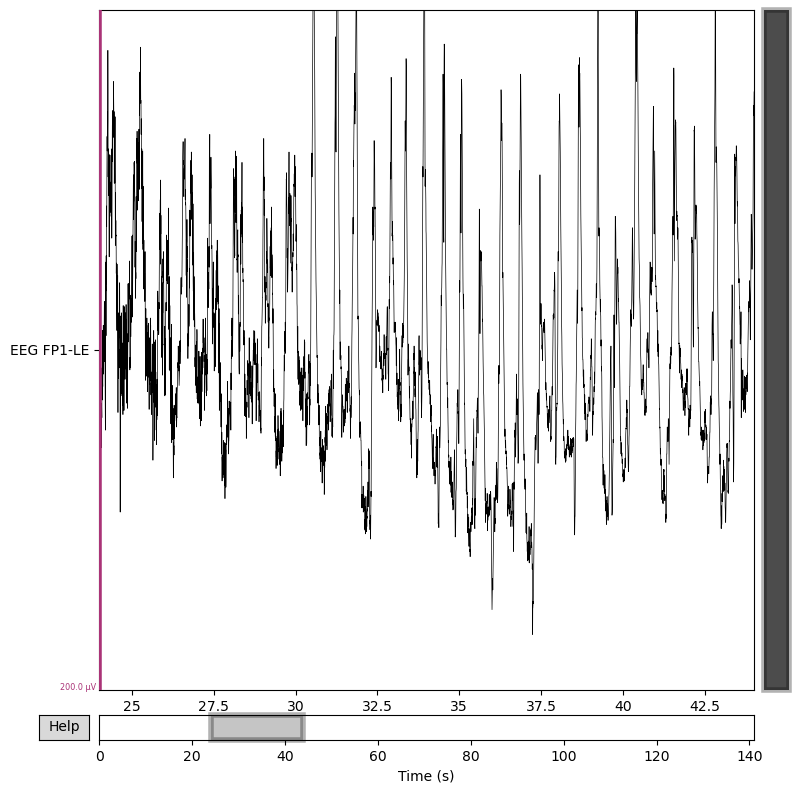

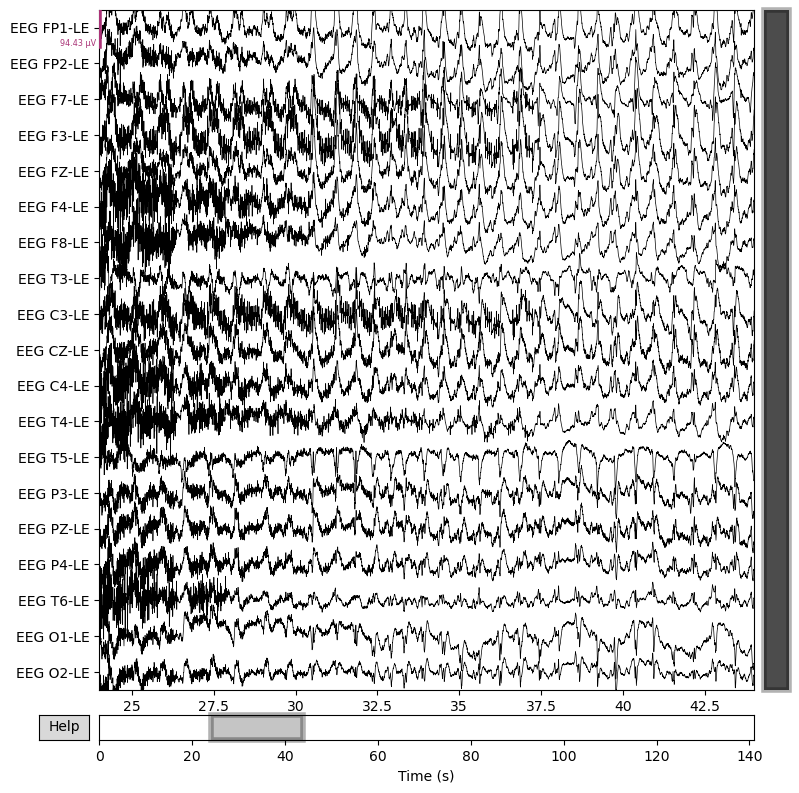

In [49]:
# Define the specific channels you want to plot
channels_to_plot = ['EEG FP1-LE']

# Close all previous figures
plt.close('all')
# Plot the specific channels
raw_selected.plot(
    picks=channels_to_plot,  # Specify the channels to plot
    duration=20,
    start=24,
    scalings= {'eeg': 10e-5},
    title='Raw EEG Data - Specific Channels',
    show=True,
    block=False
)

# Close all previous figures
plt.close('all')
raw_selected.plot(
    n_channels=19,
    duration=20,
    start=24,
    scalings='auto',
    title='Raw EEG Data',
    show=False,
    block=False
)

# # Close all previous figures
# plt.close('all')

In [50]:
# Filter the channels that include 'eog' (case-insensitive)
ecg_channels = [ch for ch in raw.ch_names if 'ekg' in ch.lower() or 'ecg' in ch.lower()]

if len(ecg_channels) > 0:
    # Copy raw and pick only the EOG channels
    raw_selected_ecg = raw.copy().pick_channels(ecg_channels)
    print(f"ECG channels: {raw_selected_ecg.ch_names}")
else:
    # Create an empty raw object if no EOG channels are found
    raw_selected_ecg = None
    print("No ECG channels found.")

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
ECG channels: ['EEG EKG-LE']


In [51]:
# Filter the channels that include 'eog' (case-insensitive)
eog_channels = [ch for ch in raw.ch_names if 'eog' in ch.lower()]

if len(eog_channels) > 0:
    # Copy raw and pick only the EOG channels
    raw_selected_eog = raw.copy().pick_channels(eog_channels)
    print(f"EOG channels: {raw_selected_eog.ch_names}")
else:
    # Create an empty raw object if no EOG channels are found
    raw_selected_eog = None
    print("No EOG channels found.")

No EOG channels found.


In [52]:
raw_cleaned = raw_selected.copy()

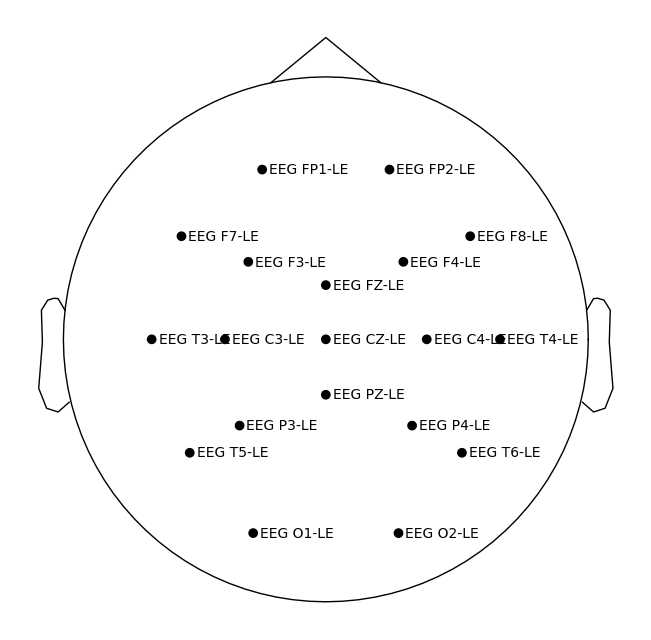

In [53]:
# Define positions (in meters) for the channels

pos = {'FP1': (-0.03, 0.08, 0.05),
'FP2': (0.03, 0.08, 0.05),
'F3': (-0.04, 0.04, 0.06),
'F4': (0.04, 0.04, 0.06),
'C3': (-0.05, 0.00, 0.04),
'C4': (0.05, 0.00, 0.04),
'P3': (-0.04, -0.04, 0.03),
'P4': (0.04, -0.04, 0.03),
'O1': (-0.03, -0.08, 0.02),
'O2': (0.03, -0.08, 0.02),
'F7': (-0.07, 0.05, 0.06),
'F8': (0.07, 0.05, 0.06),
'T3': (-0.08, 0.00, 0.04),
'T4': (0.08, 0.00, 0.04),
'T5': (-0.06, -0.05, 0.03),
'T6': (0.06, -0.05, 0.03),
'FZ': (0.00, 0.03, 0.07),
'CZ': (0.00, 0.00, 0.06),
'PZ': (0.00, -0.03, 0.05)}

# Convert positions to a format compatible with MNE
montage_positions = {ch_name: np.array(pos[ch_name.replace('EEG ', '').replace('-LE', '')])
                     for ch_name in selected_channels}


# Create a custom montage
montage = mne.channels.make_dig_montage(ch_pos=montage_positions, coord_frame='head')

# Apply the montage to the raw data
raw_cleaned.set_montage(montage)

plt.close('all')
# Plot to verify that electrode locations are now added
raw_cleaned.plot_sensors(show_names=True)

plt.close('all')

In [54]:
preprocEEG = raw_cleaned.copy()

# Define the Butterworth filter parameters with filtfilt applied
iir_params = dict(order=6, ftype='butter', output='sos')

# Band-pass filter the data using a 6th-order Butterworth filter with filtfilt applied
preprocEEG.filter(l_freq=1.0, h_freq=40, method='iir', iir_params=iir_params, phase='zero')

# Notch filter to remove power line noise (assuming 60 Hz)
preprocEEG.notch_filter(freqs=60.0)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 24 (effective, after forward-backward)
- Cutoffs at 1.00, 40.00 Hz: -6.02, -6.02 dB

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 1651 samples (6.604 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished


Measurement date,"January 01, 2010 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaajqo
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


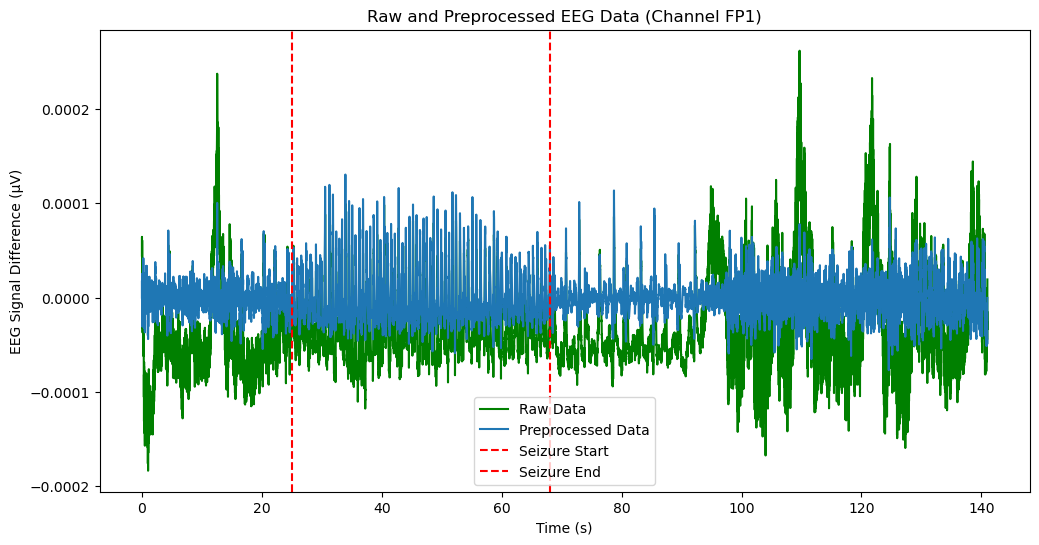

In [55]:
preprocEEG_data, preprocEEG_times = preprocEEG[:]  # raw EEG data and times
raw_data, raw_times = raw_selected[:]  # raw EEG data and times

# Plot the difference for a specific channel (e.g., channel 0)
channel_idx = 0  # index of the channel you want to plot
plt.figure(figsize=(12, 6))
# You can keep adding more plots on the same figure this way
plt.plot(raw_times, raw_data[channel_idx, :], label='Raw Data', color='green')
plt.plot(raw_times, preprocEEG_data[channel_idx, :], label='Preprocessed Data')
plt.axvline(x=seizure_start, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=seizure_end, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (s)')
plt.ylabel('EEG Signal Difference (µV)')
plt.title(f'Raw and Preprocessed EEG Data (Channel {simplified_names[channel_idx]})')
plt.legend()
plt.show()

In [56]:
eegICA = preprocEEG.copy()
from mne.preprocessing import ICA

# Set up the ICA object, specifying the number of components to compute
ica = ICA(n_components=19, random_state=97, max_iter=1000)

# Fit ICA to the raw data
ica.fit(eegICA)

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 0.4s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,38 iterations on raw data (35250 samples)
ICA components,19
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,—


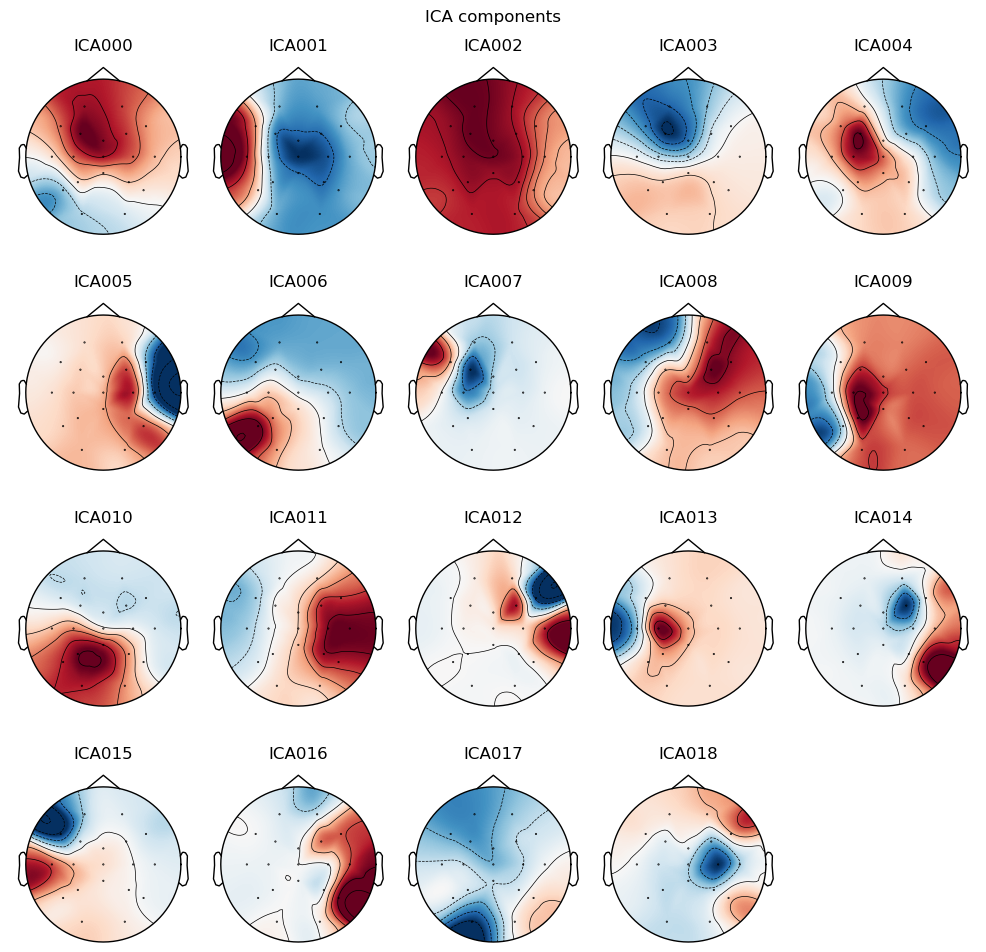

In [57]:
# Plot ICA components to manually inspect them
ica.plot_components()
plt.close('all')

In [58]:
emg_inds, scores = ica.find_bads_muscle(eegICA)
ica.exclude.extend(emg_inds)

Effective window size : 8.192 (s)


In [59]:
ica

Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,38 iterations on raw data (35250 samples)
ICA components,19
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,ICA002ICA005ICA007ICA008ICA012ICA013ICA014ICA015ICA016ICA018


In [60]:
# Apply the ICA to the raw data
ica.apply(eegICA)

Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 10 ICA components
    Projecting back using 19 PCA components


Measurement date,"January 01, 2010 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaajqo
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


In [61]:
eegICA.set_eeg_reference(ref_channels='average')

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


Measurement date,"January 01, 2010 00:00:00 GMT"
Experimenter,Unknown
Participant,aaaaajqo
Digitized points,22 points
Good channels,19 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,250.00 Hz
Highpass,1.00 Hz
Lowpass,40.00 Hz


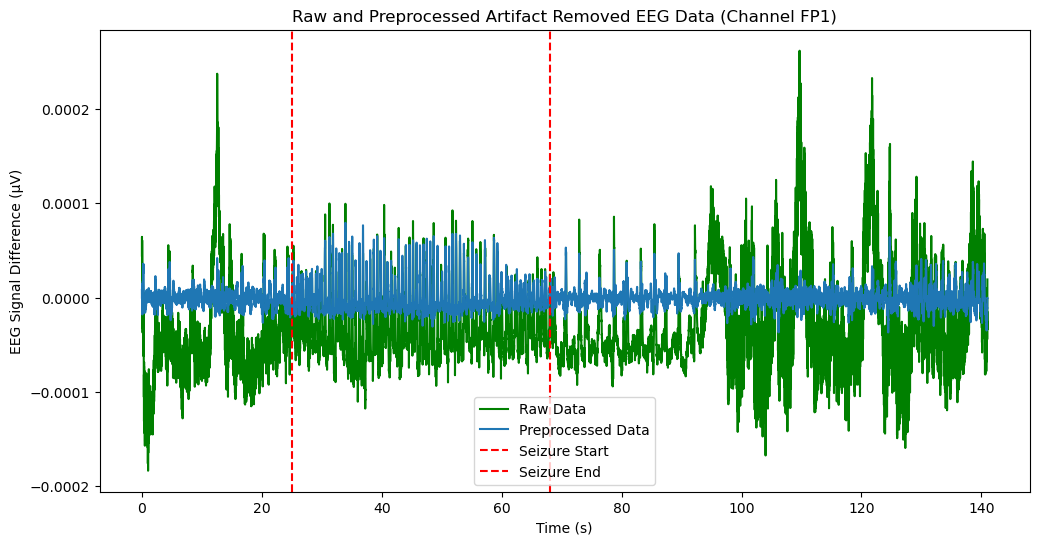

In [62]:
eegICA_data, eeg_times = eegICA[:,:]
# Comparison between raw and preprocessed artifact removed EEG
channel_idx = 0  # index of the channel you want to plot
plt.figure(figsize=(12, 6))
# You can keep adding more plots on the same figure this way
plt.plot(raw_times, raw_data[channel_idx, :], label='Raw Data', color='green')
plt.plot(raw_times, eegICA_data[channel_idx, :], label='Preprocessed Data')
plt.axvline(x=seizure_start, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=seizure_end, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (s)')
plt.ylabel('EEG Signal Difference (µV)')
plt.title(f'Raw and Preprocessed Artifact Removed EEG Data (Channel {simplified_names[channel_idx]})')
plt.legend()
plt.show()

In [63]:
print(eegICA.info)

<Info | 10 non-empty values
 bads: []
 ch_names: EEG FP1-LE, EEG FP2-LE, EEG F7-LE, EEG F3-LE, EEG FZ-LE, EEG ...
 chs: 19 EEG
 custom_ref_applied: True
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 1.0 Hz
 lowpass: 40.0 Hz
 meas_date: 2010-01-01 00:00:00 UTC
 nchan: 19
 projs: []
 sfreq: 250.0 Hz
 subject_info: 3 items (dict)
>


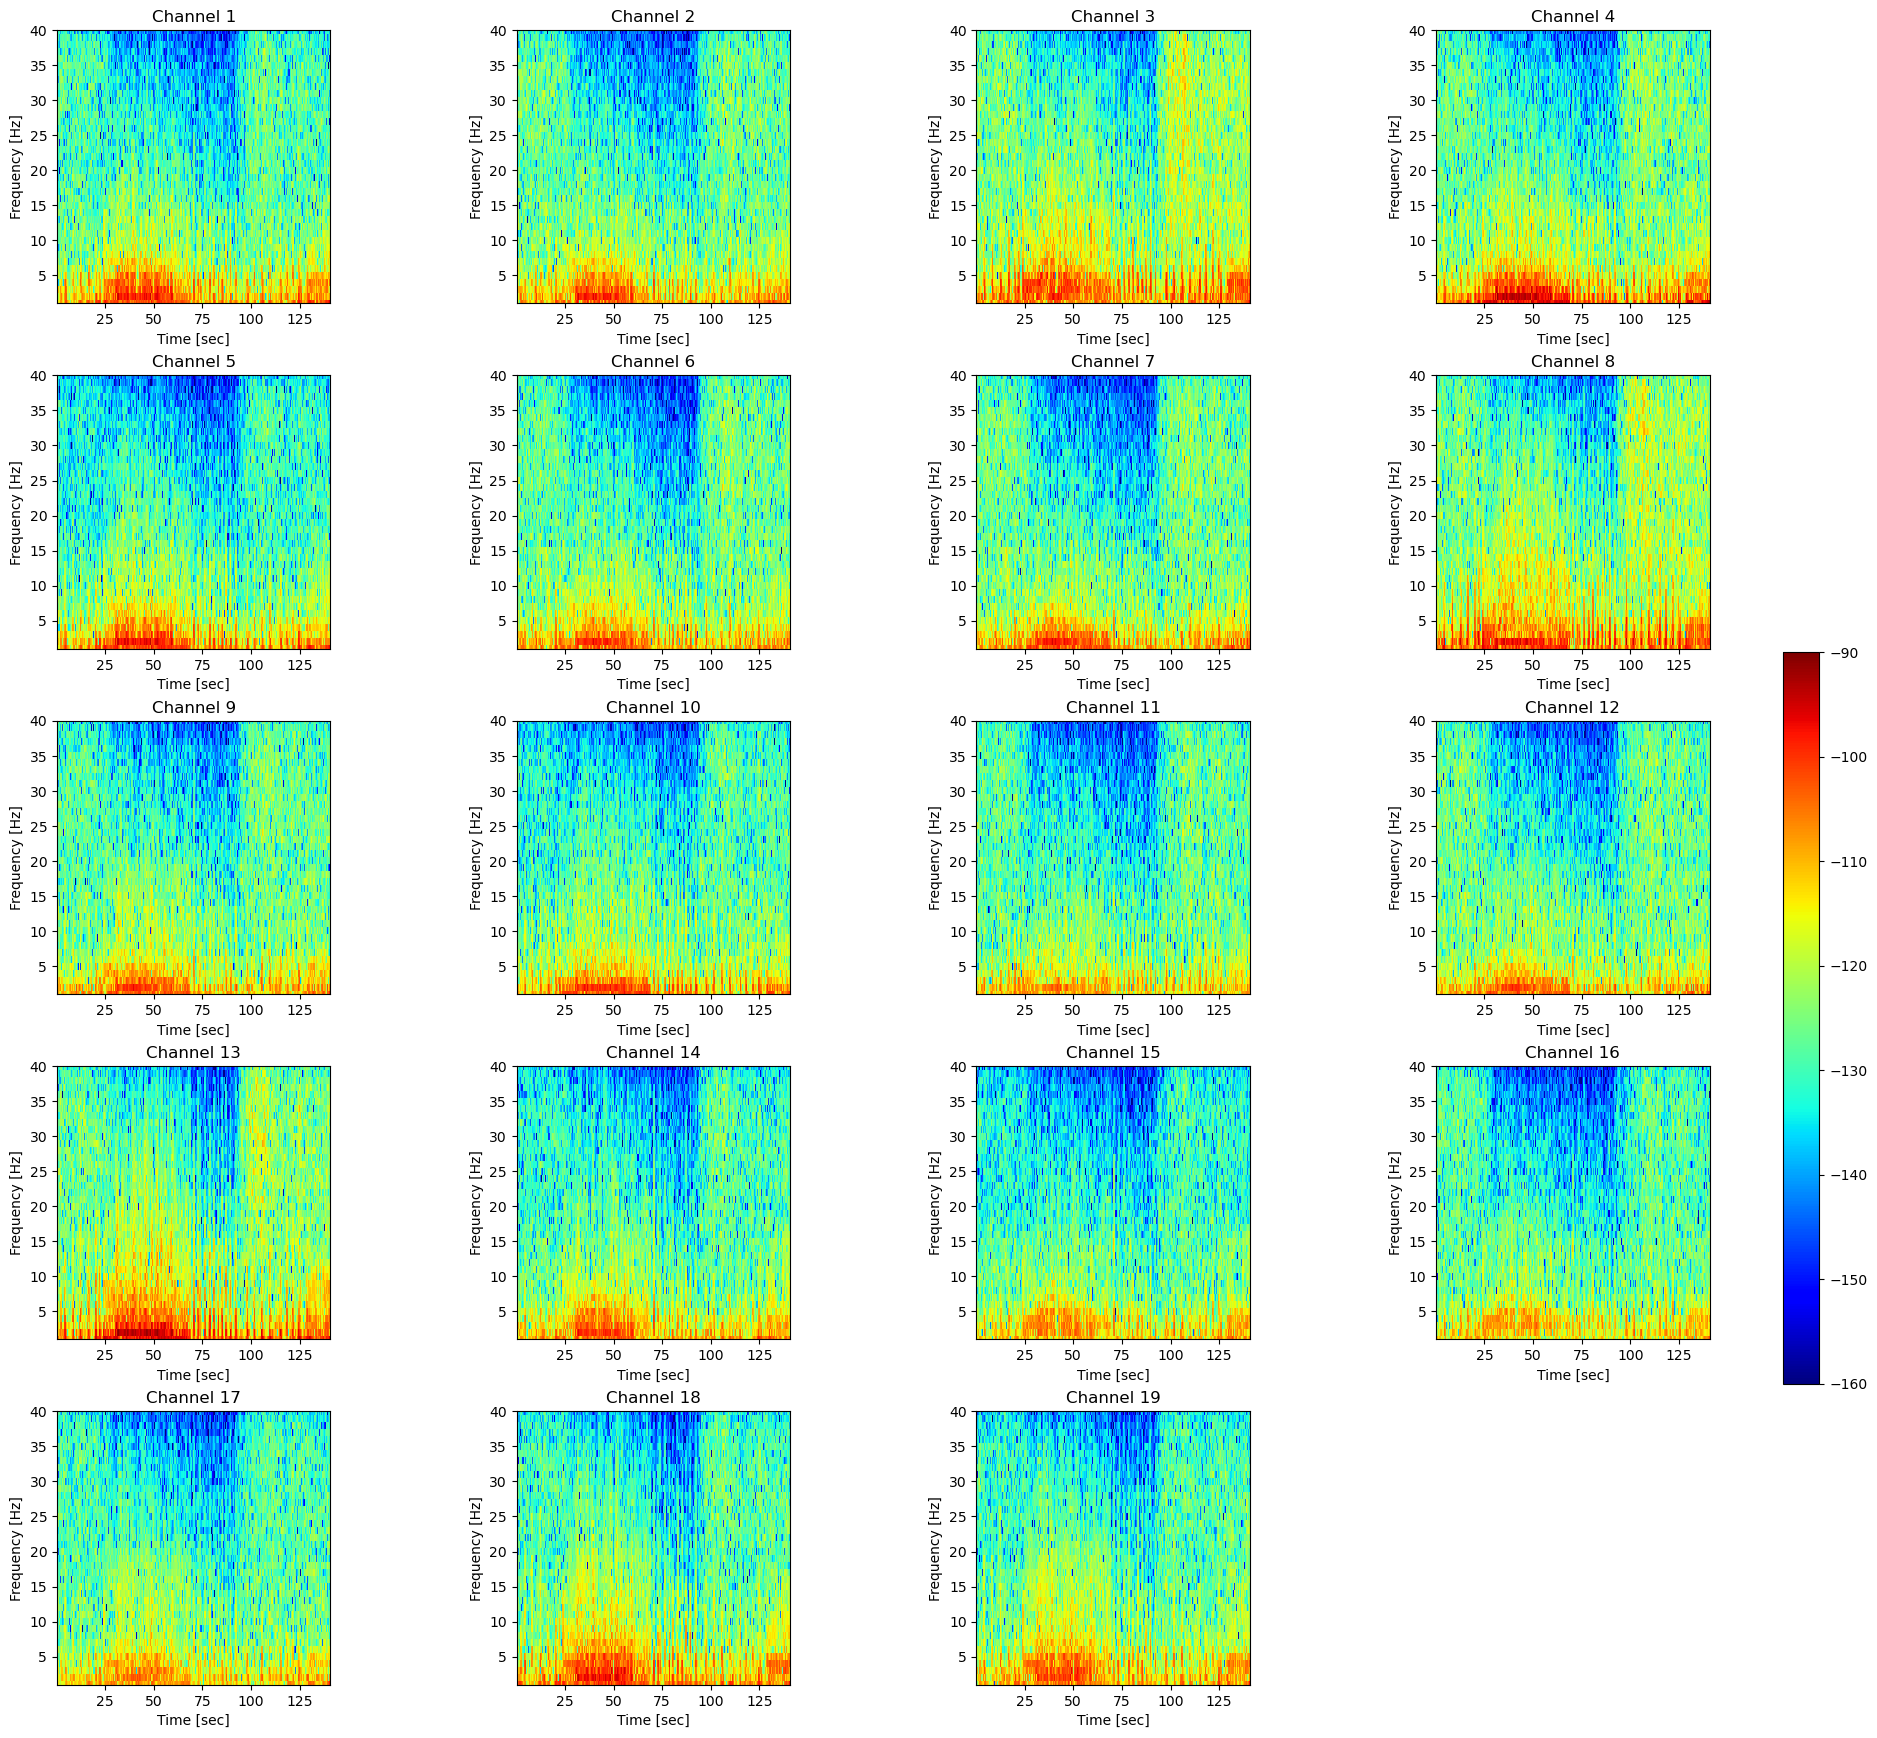

In [64]:
from scipy.signal import spectrogram

channel_index = 1
# Generate a sample signal (sine wave with two frequencies)
fs = sampfreq  # Sampling frequency (Hz)
# Extract signal data
data, times = eegICA[:, :]
signal = data[channel_index, :]

# Parameters for the spectrogram
nperseg = fs  # Length of each segment (window length)
noverlap = fs//2  # Number of points to overlap between segments

nrows = 6
ncols = 4

num_channels = 19
# Create subplots for all channels
fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20), constrained_layout=True)
axes = axes.flatten()  # Flatten the axes for easier indexing

for i in range(num_channels):
    # Generate the spectrogram for each channel
    frequencies, times, Sxx = spectrogram(data[i],  fs, nperseg=nperseg, noverlap=noverlap)
    
    # Plot spectrogram for each channel
    img = axes[i].pcolormesh(times, frequencies, 10 * np.log10(Sxx), cmap = 'jet')

    # Set color limits
    img.set_clim(-160, -90)

    axes[i].set_title(f'Channel {i+1}')
    axes[i].set_ylabel('Frequency [Hz]')
    axes[i].set_xlabel('Time [sec]')
    axes[i].set_ylim(1, 40)  # Adjust based on your frequency range of interest
    axes[i].set_box_aspect(1)  # equivalent of 'Box' being 'on'

# Hide unused subplots if there are fewer channels than subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.colorbar(axes[0].collections[0], ax=axes, orientation='vertical', fraction=0.02, pad=0.04)
plt.show()


In [65]:
fs

250

In [66]:
def bandpass_filter(data, sfreq, low_freq, high_freq):
    """
    Band-pass filter the data.
    
    Parameters:
    data (ndarray): The input signal of shape (n_channels, n_times)
    sfreq (float): The sampling frequency
    low_freq (float): The lower bound of the frequency range
    high_freq (float): The upper bound of the frequency range
    
    Returns:
    filtered_data (ndarray): The band-pass filtered signal
    """
    nyquist = 0.5 * sfreq
    low = low_freq / nyquist
    high = high_freq / nyquist
    b, a = butter(4, [low, high], btype='band')
    filtered_data = filtfilt(b, a, data, axis=1)
    return filtered_data

In [67]:
# Band pass filtering and phase calculation
eeg_data, _ = eegICA[:]
low_freq = 4
high_freq = 8
# Band-pass filter the data in the specified frequency band
eeg_data_filtered = bandpass_filter(eeg_data, sampfreq, low_freq, high_freq)
    
# Compute the analytic signal (Hilbert transform) to get the phase
analytic_signal = hilbert(eeg_data_filtered, axis=1)
phase_data = np.angle(analytic_signal)

In [69]:
# Extract seizure and background epochs
seizure_Seg = eegICA.copy().crop(tmin=seizure_start, tmax=seizure_end)
background_Seg_1 = eegICA.copy().crop(tmin=background_start_1, tmax=background_end_1)
background_Seg_2 = eegICA.copy().crop(tmin=background_start_2, tmax=background_end_2)

# If you need to combine the two background segments into one:
background_Seg = mne.concatenate_raws([background_Seg_1.copy(), background_Seg_2.copy()])

seizure_phase_Seg = phase_data.copy()[:, seizure_start*sampfreq:seizure_end*sampfreq]
back_phase_Seg = np.concatenate((phase_data.copy()[:, background_start_1*sampfreq:background_end_1*sampfreq], phase_data.copy()[:, background_start_2*sampfreq:background_end_2*sampfreq]), axis = 1)
print(seizure_phase_Seg.shape)
print(back_phase_Seg.shape)

(19, 10750)
(19, 23750)


In [103]:
seizure_phase_Seg

array([[-2.65786837, -2.53330533, -2.40840616, ..., -0.8041786 ,
        -0.66677344, -0.53025715],
       [ 0.98702633,  1.09482707,  1.20261001, ...,  2.53892249,
         2.65187135,  2.76478934],
       [-2.5171208 , -2.39977616, -2.28238491, ..., -1.00222611,
        -0.88247643, -0.76280119],
       ...,
       [ 0.75938282,  0.87681666,  0.99428259, ...,  2.50996713,
         2.62650216,  2.74304835],
       [ 0.89410407,  1.01329418,  1.13255408, ..., -2.8989254 ,
        -2.78990613, -2.68076734],
       [ 0.68862492,  0.80710535,  0.92564357, ...,  2.85545603,
         2.9683436 ,  3.08128129]])

In [70]:
seizure_end

68

In [71]:
back_phase_Seg = np.concatenate((phase_data.copy()[:, background_start_1*sampfreq:background_end_1*sampfreq], phase_data.copy()[:, background_start_2*sampfreq:background_end_2*sampfreq]), axis = 1)


In [72]:
seizure_start*sampfreq

6250

In [73]:
seizure_start*sampfreq

6250

In [74]:
seizure_end*sampfreq

17000

In [75]:
phase_data.copy().shape

(19, 35250)

In [76]:
# Parameters
epoch_length = 1  # in seconds
epoch_samples = int(epoch_length * sampfreq)

def epoch_data(data, sfreq, epoch_length):
    n_channels, n_samples = data.shape
    epoch_samples = int(epoch_length * sfreq)
    n_epochs = n_samples // epoch_samples
    epochs = np.array_split(data[:, :n_epochs * epoch_samples], n_epochs, axis=1)
    return epochs, n_epochs

# Epoch the seizure_Seg and background_Seg
seizure_epochs = epoch_data(seizure_Seg[:][0][:19], sampfreq, epoch_length)
background_epochs = epoch_data(background_Seg[:][0][:19], sampfreq, epoch_length)

seizure_phase_epochs, n_seizure_epochs  = epoch_data(seizure_phase_Seg[:19, :], sampfreq, epoch_length)
background_phase_epochs, n_background_epochs  = epoch_data(back_phase_Seg[:19, :], sampfreq, epoch_length)

In [77]:
def calculate_plv(phasedata):
    """
    Calculate the Phase Locking Value (PLV) between pairs of EEG channels.
    
    Parameters:
    eeg_data (ndarray): EEG data of shape (n_channels, n_times)
    sfreq (float): Sampling frequency of the EEG data
    low_freq (float): Lower frequency bound for band-pass filter (default 8 Hz)
    high_freq (float): Upper frequency bound for band-pass filter (default 13 Hz)
    
    Returns:
    plv_matrix (ndarray): PLV matrix of shape (n_channels, n_channels)
    """
    n_channels, n_times = phasedata.shape
    plv_matrix = np.zeros((n_channels, n_channels))
    
    # Calculate PLV
    for i in range(n_channels):
        for j in range(i + 1, n_channels):
            phase_diff = phasedata[i] - phasedata[j]
            plv = np.abs(np.sum(np.exp(1j * phase_diff)) / n_times)
            plv_matrix[i, j] = plv
            plv_matrix[j, i] = plv  # PLV is symmetric
    
    return plv_matrix

In [78]:
low_freq = 4
high_freq = 8

# low_freq = 1
# high_freq = 4

# low_freq = 8
# high_freq = 13

# low_freq = 13
# high_freq = 30

# low_freq = 30
# high_freq = 50

plv_matrix_seiz = np.zeros((19, 19, n_seizure_epochs, high_freq-low_freq))
plv_matrix_back = np.zeros((19, 19, n_background_epochs, high_freq-low_freq))

for freq in range(low_freq, high_freq):
    freq_n = freq-low_freq

    # Band-pass filter the data in the specified frequency band
    eeg_data_filtered = bandpass_filter(eeg_data, sampfreq, low_freq, low_freq+1)
        
    # Compute the analytic signal (Hilbert transform) to get the phase
    analytic_signal = hilbert(eeg_data_filtered, axis=1)
    phase_data = np.angle(analytic_signal)

    seizure_phase_Seg = phase_data.copy()[:, seizure_start*sampfreq:seizure_end*sampfreq]
    back_phase_Seg = np.concatenate((phase_data.copy()[:, background_start_1*sampfreq:background_end_1*sampfreq], phase_data.copy()[:, background_start_2*sampfreq:background_end_2*sampfreq]), axis = 1)

    seizure_phase_epochs, _ = epoch_data(seizure_phase_Seg, sampfreq, epoch_length)
    background_phase_epochs, _ = epoch_data(back_phase_Seg, sampfreq, epoch_length)

    epoch_n = 0
    for epoch in seizure_phase_epochs:
        plv_matrix_seiz[:, :, epoch_n, freq_n] = calculate_plv(epoch)
        epoch_n = epoch_n + 1

    epoch_n = 0
    for epoch in background_phase_epochs:
        plv_matrix_back[:, :, epoch_n, freq_n] = calculate_plv(epoch)
        epoch_n = epoch_n + 1

plv_seiz_all = np.mean(plv_matrix_seiz, axis = 3)
plv_back_all = np.mean(plv_matrix_back, axis = 3)

In [104]:
plv_seiz_all

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.49575324, 0.95680257, 0.22943485, ..., 0.56785193,
         0.99169021, 0.84785383],
        [0.87735456, 0.96750536, 0.89204385, ..., 0.86311797,
         0.98750692, 0.95236572],
        ...,
        [0.86545149, 0.96181448, 0.78966215, ..., 0.98076292,
         0.97550838, 0.48246233],
        [0.95023414, 0.93330022, 0.93077926, ..., 0.88763089,
         0.99392788, 0.54493763],
        [0.92185079, 0.97226673, 0.90673307, ..., 0.89798755,
         0.98786654, 0.37063186]],

       [[0.49575324, 0.95680257, 0.22943485, ..., 0.56785193,
         0.99169021, 0.84785383],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.26462601, 0.92443469, 0.51305447, ..., 0.6547096 ,
         0.99823699, 0.82575266],
        ...,
        [0.32731151, 0.91907715, 0.67168631, ..., 0.65875675,
         0.99479274, 0.71076643],
        [0.3

In [79]:
# Helper function to create graph from PLV matrix
def create_graph(plv_matrix, ch_names):
    G = nx.Graph()
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if i < j:  # To avoid duplicate edges
                weight = plv_matrix[i, j]
                G.add_edge(ch1, ch2, weight=weight)
    return G

In [80]:
# Process seizure and background epochs
ch_names = seizure_Seg.ch_names[:]

graphs_seiz = []
epoch_n = 0
for epoch in seizure_phase_epochs:
    graph = create_graph(plv_seiz_all[:, :, epoch_n], ch_names)
    graphs_seiz.append(graph)
    epoch_n = epoch_n + 1

In [81]:
graphs_back = []
epoch_n = 0
for epoch in background_phase_epochs:
    graph = create_graph(plv_back_all[:, :, epoch_n], ch_names)
    graphs_back.append(graph)
    epoch_n = epoch_n + 1

# Finding appropriate Threshold using Frequency Domain Bootstrap Method 

In [82]:
from scipy.fft import fft, ifft
# from scipy.signal.windows import hann
from scipy.stats import norm

def compute_power_spectrum(time_series):
    """Compute the power spectrum of the input time series using Hann window."""

    # Compute FFT
    fft_values = np.fft.fft(time_series)
    # Compute Power Spectrum
    power_spectrum = np.abs(fft_values) ** 2 / len(time_series)

    return power_spectrum

In [83]:
# Step 1: Compute power spectrum for each time series and average them
# time_series is an array of shape (19, x)
power_spectra = np.array([compute_power_spectrum(eeg_data[i, :]) for i in range(eeg_data.shape[0])])

In [84]:
# power_spectra = np.array([compute_power_spectrum(ts) for ts in time_series])
avg_spectrum = np.mean(power_spectra, axis=0)

In [85]:
def compute_whitened_residuals(time_series, avg_spectrum):
    """Compute the whitened residuals of the time series."""
    spectrum = fft(time_series)
    residuals = ifft(spectrum / np.sqrt(avg_spectrum))  # No sqrt, just dividing by avg_spectrum
    return residuals

In [86]:
# Step 2: Compute the whitened residuals for each time series
whitened_residuals = np.array([compute_whitened_residuals(eeg_data[i, :], avg_spectrum) for i in range(eeg_data.shape[0])])

In [87]:
def resample_with_replacement(data):
    """Resample data with replacement."""
    indices = np.random.randint(0, data.shape, data.shape)
    return data[indices]

In [88]:
n_nodes = 19
n_data_points = eeg_data.shape[1]
n_surrogates = 10
surrogate_data = np.zeros((n_surrogates, n_nodes, n_data_points), dtype=complex)
    
for i in range(n_surrogates):
    for node in range(n_nodes):
        # Resample residuals and compute surrogate data
        resampled_residuals = resample_with_replacement(whitened_residuals[node])
        surrogate_spectrum = fft(resampled_residuals) * np.sqrt(avg_spectrum)  # Use avg_spectrum directly
        surrogate_data[i, node] = ifft(surrogate_spectrum)

In [89]:
surrogate_datar = abs(surrogate_data)

In [90]:
n_surrog = 10
n_surrogate_epochs = n_seizure_epochs + n_background_epochs+3
plv_matrix_surrogate = np.zeros((19, 19, n_surrogate_epochs, high_freq-low_freq, n_surrog))

for surrog_num in range(n_surrog):
    for freq in range(low_freq, high_freq):
        freq_n = freq-low_freq

        # Band-pass filter the data in the specified frequency band
        eeg_data_filtered = bandpass_filter(surrogate_datar[surrog_num, :, :], sampfreq, low_freq, low_freq+1)
            
        # Compute the analytic signal (Hilbert transform) to get the phase
        analytic_signal = hilbert(eeg_data_filtered, axis=1)
        phase_data = np.angle(analytic_signal)

        phase_Seg = phase_data.copy()

        surrogate_phase_epochs, _ = epoch_data(phase_Seg, sampfreq, epoch_length)

        epoch_n = 0
        for epoch in surrogate_phase_epochs:
            plv_matrix_surrogate[:, :, epoch_n, freq_n, surrog_num] = calculate_plv(epoch)
            epoch_n = epoch_n + 1

plv_surrogate_all = np.mean(plv_matrix_surrogate, axis = 3)

surrogate_plv = np.mean(plv_surrogate_all, axis = 2)

In [91]:
p_values_back = np.zeros((n_nodes, n_nodes, n_background_epochs))

for epoch in range(n_background_epochs):
    for i in range(n_nodes):
        for j in range(i+1, n_nodes):
            surrogate_distribution = surrogate_plv[i, j, :]
            original_value = plv_back_all[i, j, epoch]
            p_values_back[i, j, epoch] = np.mean(surrogate_distribution >= original_value)
            p_values_back[j, i, epoch] = p_values_back[i, j, epoch]  # Since it's symmetric

In [92]:
# Many times repetition
p_values_seiz = np.zeros((n_nodes, n_nodes, n_seizure_epochs))

for epoch in range(n_seizure_epochs):
    for i in range(n_nodes):
        for j in range(i+1, n_nodes):
            surrogate_distribution = surrogate_plv[i, j, :]
            original_value = plv_seiz_all[i, j, epoch]
            p_values_seiz[i, j, epoch] = np.mean(surrogate_distribution >= original_value)
            p_values_seiz[j, i, epoch] = p_values_seiz[i, j, epoch]  # Since it's symmetric

In [93]:
plv_seiz_bi= (p_values_seiz<0.05).astype(int)
plv_back_bi= (p_values_back<0.05).astype(int)

In [94]:
# Helper function to create graph from PLV matrix
def create_graph_bi(plv_matrix, ch_names):
    
    G = nx.Graph()
    for i, ch1 in enumerate(ch_names):
        for j, ch2 in enumerate(ch_names):
            if i < j:  # To avoid duplicate edges
                weight = plv_matrix[i, j]
                if weight == 1:
                    G.add_edge(ch1, ch2, weight=1)  # Binary edge
    return G

In [95]:
# Process seizure and background epochs
ch_names = seizure_Seg.ch_names[:]

graphs_seiz_bi = []
epoch_n = 0
for epoch in seizure_phase_epochs:
    graph = create_graph_bi(plv_seiz_bi[:, :, epoch_n], ch_names)
    graphs_seiz_bi.append(graph)
    epoch_n = epoch_n + 1

In [96]:
# Process seizure and background epochs
ch_names = background_Seg.ch_names[:]

graphs_back_bi = []
epoch_n = 0
for epoch in background_phase_epochs:
    graph = create_graph_bi(plv_back_bi[:, :, epoch_n], ch_names)
    graphs_back_bi.append(graph)
    epoch_n = epoch_n + 1

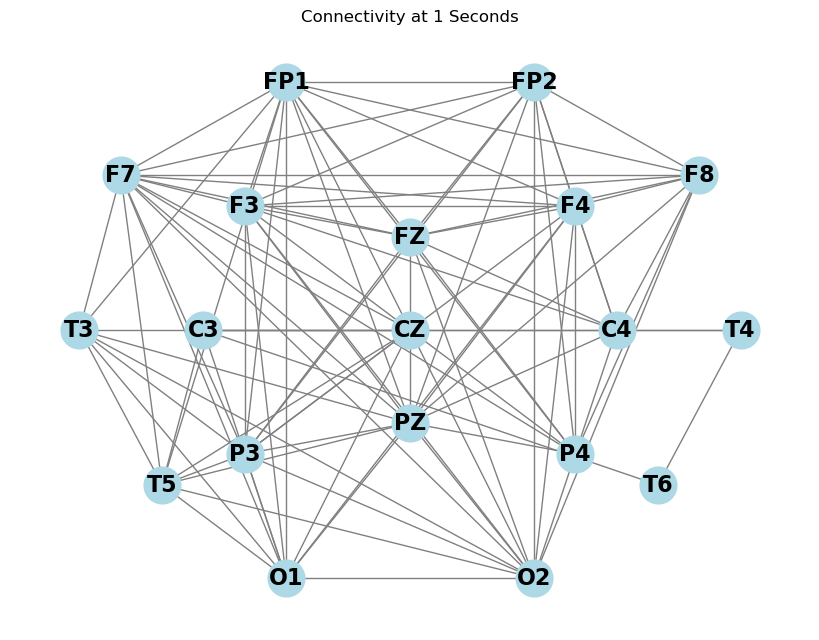

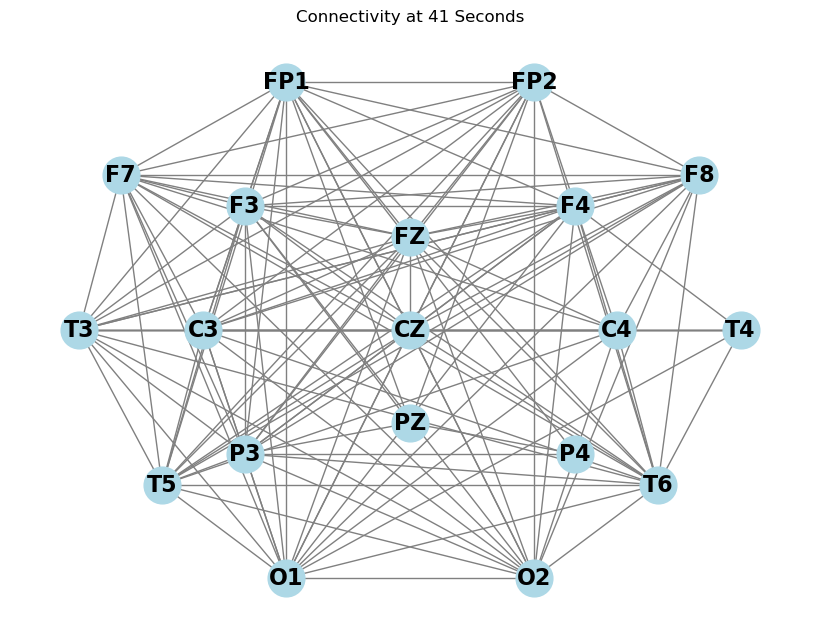

In [97]:
# Original electrode names
# Original electrode names
electrode_names = [
    'EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE',
    'EEG P3-LE', 'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE',
    'EEG T3-LE', 'EEG T4-LE', 'EEG T5-LE', 'EEG T6-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE'
]
cleaned_electrode_names = [name.replace('EEG ', '').replace('-REF', '') for name in electrode_names]
# Simplified electrode names
simplified_names = [
    'FP1', 'FP2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4',
    'T5', 'T6', 'FZ', 'CZ', 'PZ'
]
pos = {'FP1': (-0.3, 0.8),
 'FP2': (0.3, 0.8),
 'F3': (-0.4, 0.4),
 'F4': (0.4, 0.4),
 'C3': (-0.5, 0.0),
 'C4': (0.5, 0.0),
 'P3': (-0.4, -0.4),
 'P4': (0.4, -0.4),
 'O1': (-0.3, -0.8),
 'O2': (0.3, -0.8),
 'F7': (-0.7, 0.5),
 'F8': (0.7, 0.5),
 'T3': (-0.8, 0),
 'T4': (0.8, 0),
 'T5': (-0.6, -0.5),
 'T6': (0.6, -0.5),
 'FZ': (0.0, 0.3),
 'CZ': (0.0, 0.0),
 'PZ': (0.0, -0.3)}

# Create the mapping dictionary
label_mapping = dict(zip(electrode_names, simplified_names))

# Function to relabel nodes
def relabel_nodes(G, mapping):
    return nx.relabel_nodes(G, mapping, copy=True)

plt.close('all')
# Plot graphs
for i in range(0, 44, 40):  # Indexes for the first and third graphs
    G = graphs_back_bi[i]
    # Relabel the nodes in the graph
    G = relabel_nodes(G, label_mapping)
    weights = nx.get_edge_attributes(G, 'weight')

    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=16, font_weight='bold', edge_color='gray')
    plt.title(f'Connectivity at {i+1} Seconds')
    plt.show()
plt.close('all')

[{'density': 0.38596491228070173}, {'density': 0.7485380116959064}, {'density': 0.543859649122807}, {'density': 0.7660818713450293}, {'density': 0.8888888888888888}, {'density': 0.6549707602339181}, {'density': 1.0}, {'density': 0.9411764705882353}, {'density': 0.4444444444444444}, {'density': 0.8128654970760234}, {'density': 0.5672514619883041}, {'density': 0.8823529411764706}, {'density': 0.4093567251461988}, {'density': 0.47368421052631576}, {'density': 0.6783625730994152}, {'density': 0.8362573099415205}, {'density': 0.5672514619883041}, {'density': 0.9590643274853801}, {'density': 0.5087719298245614}, {'density': 0.7602339181286549}, {'density': 0.8596491228070176}, {'density': 0.6900584795321637}, {'density': 1.0}, {'density': 0.9803921568627451}, {'density': 0.9005847953216374}, {'density': 0.8300653594771242}, {'density': 0.5555555555555556}, {'density': 1.0}, {'density': 0.9005847953216374}, {'density': 0.9590643274853801}, {'density': 1.0}, {'density': 0.9191176470588235}, {'

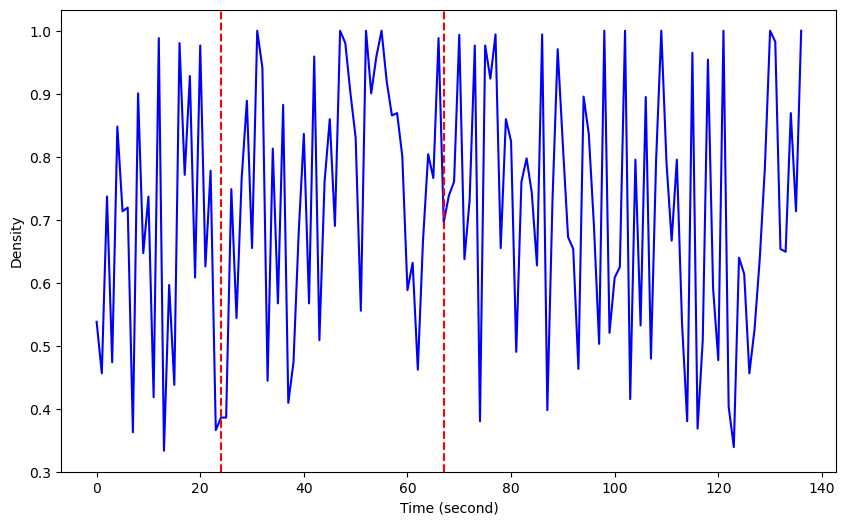

In [98]:
def feature_extract_bi(graph):
    features = {}
    
    features['density'] = nx.density(graph)
    # features['clustering_coefficient'] = nx.average_clustering(graph)
        # Calculate clustering coefficient with error handling
        
    return features

features_seizure_bi = [feature_extract_bi(G) for G in graphs_seiz_bi]
print(features_seizure_bi)

features_background_bi = [feature_extract_bi(G) for G in graphs_back_bi]
print(features_background_bi)

# Initialize lists to collect each feature
density_seizure_list = []

# Collect each feature into lists
for features in features_seizure_bi:
    density_seizure_list.append(features['density'])

# Convert lists to numpy arrays for easier computation
density_seizure_array = np.array(density_seizure_list)

# Calculate mean and standard deviation for each feature
mean_density_seizure = np.mean(density_seizure_array)
std_density_seizure = np.std(density_seizure_array)

# Print results
print(f"Density Seizure: Mean = {mean_density_seizure}, Standard Deviation = {std_density_seizure}")

# Initialize lists to collect each feature
density_background_list = []

# Collect each feature into lists
for features in features_background_bi:
    density_background_list.append(features['density'])

# Convert lists to numpy arrays for easier computation
density_background_array = np.array(density_background_list)

# Calculate mean and standard deviation for each feature
mean_density_background = np.mean(density_background_array)
std_density_background = np.std(density_background_array)

# Print results
print(f"Density Background: Mean = {mean_density_background}, Standard Deviation = {std_density_background}")

# Concatenate the segments
density_combined = np.concatenate((density_background_array[:background_end_1+1], density_seizure_array, density_background_array[background_end_1+2:]))

length = len(density_combined)
x_values = list(range(0, length, 1))
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], density_combined, color='blue')
plt.axvline(x=seizure_start-1, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=seizure_end-1, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Density')
# plt.title('Graph Densities (Background + Seizure)')
# plt.legend()
plt.show()

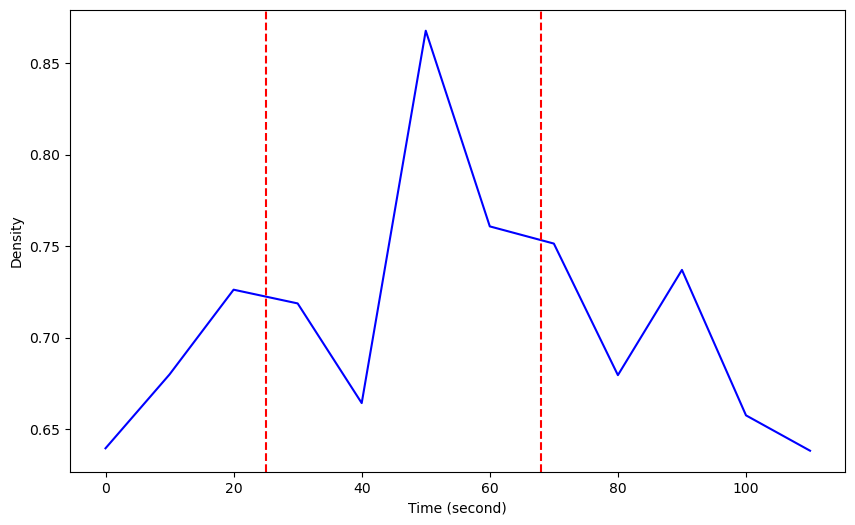

In [99]:
reshaped_array = density_background_array[:len(density_background_array)//10*10].reshape(-1, 10)
averaged_density_background_array = reshaped_array.mean(axis=1)

reshaped_array = density_seizure_array[:len(density_seizure_array)//10*10].reshape(-1, 10)
averaged_density_seizure_array = reshaped_array.mean(axis=1)

# Concatenate the segments
density_combined = np.concatenate((averaged_density_background_array[:background_end_1//10+1], averaged_density_seizure_array, averaged_density_background_array[background_end_1//10+2:]))

plt.close('all')
length = len(density_combined)
x_values = list(range(0, length*10, 10))
plt.figure(figsize=(10, 6))
plt.plot(x_values, density_combined, color='blue')
plt.axvline(x=seizure_start, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=seizure_end, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Density')
plt.show()

In [100]:
def feature_extract(graph):
    features = {}

    # Calculate graph density
    features['density'] = nx.density(graph)

    # Average Clustering Coefficient
    features['avg_clustering'] = nx.average_clustering(graph)

    # Modularity requires community detection, using the 'community' package from 'python-louvain'
    # You may need to install it using: pip install python-louvain
    from community import community_louvain
    # Find communities using the Louvain method
    partition = community_louvain.best_partition(graph)
    features['modularity'] = community_louvain.modularity(partition, graph)

    # Assortativity (Degree Assortativity Coefficient)
    features['assortativity'] = nx.degree_assortativity_coefficient(graph)
    
    return features


def feature_extract_w(graph):
    features_w = {}

    # features_w['characteristic_path_length'] = nx.average_shortest_path_length(graph, weight='weight')
        # Create a new graph with inverted weights
    inverted_graph = nx.Graph()
    for u, v, d in graph.edges(data=True):
        if d['weight'] != 0:  # Ensure the weight is non-zero to avoid division by zero
            inverted_graph.add_edge(u, v, weight=1.0 / d['weight'])

    # Calculate the characteristic path length using the inverted weights
    features_w['characteristic_path_length'] = nx.average_shortest_path_length(inverted_graph, weight='weight')
    
    return features_w

features_seizure = [feature_extract(G) for G in graphs_seiz_bi]
print(features_seizure)

features_background = [feature_extract(G) for G in graphs_back_bi]
print(features_background)

features_seizure_w = [feature_extract_w(G) for G in graphs_seiz]
print(features_seizure_w)

features_background_w = [feature_extract_w(G) for G in graphs_back]
print(features_background_w)

# Initialize lists to collect each feature
density_seizure_list = []
# Initialize lists to collect each feature
clustcoef_seizure_list = []
# Initialize lists to collect each feature
modularity_seizure_list = []
# Initialize lists to collect each feature
assort_seizure_list = []
# Initialize lists to collect each feature
path_seizure_list = []
# Collect each feature into lists
for features in features_seizure:
    density_seizure_list.append(features['density'])
    clustcoef_seizure_list.append(features['avg_clustering'])
    modularity_seizure_list.append(features['modularity'])
    assort_seizure_list.append(features['assortativity'])
for features in features_seizure_w:
    path_seizure_list.append(features['characteristic_path_length'])

# Initialize lists to collect each feature
density_background_list = []
# Initialize lists to collect each feature
clustcoef_background_list = []
# Initialize lists to collect each feature
modularity_background_list = []
# Initialize lists to collect each feature
assort_background_list = []
# Initialize lists to collect each feature
path_background_list = []
# Collect each feature into lists
for features in features_background:
    density_background_list.append(features['density'])
    clustcoef_background_list.append(features['avg_clustering'])
    modularity_background_list.append(features['modularity'])
    assort_background_list.append(features['assortativity'])
for features in features_background_w:
    path_background_list.append(features['characteristic_path_length'])

# Convert lists to numpy arrays for easier computation
density_seizure_array = np.array(density_seizure_list)
# Calculate mean and standard deviation for each feature
mean_density_seizure = np.mean(density_seizure_array)
std_density_seizure = np.std(density_seizure_array)
# Print results
print(f"Density Seizure: Mean = {mean_density_seizure}, Standard Deviation = {std_density_seizure}")

# Convert lists to numpy arrays for easier computation
density_background_array = np.array(density_background_list)
# Calculate mean and standard deviation for each feature
mean_density_background = np.mean(density_background_array)
std_density_background = np.std(density_background_array)
# Print results
print(f"Density Background: Mean = {mean_density_background}, Standard Deviation = {std_density_background}")

# Convert lists to numpy arrays for easier computation - Clustcoef
clustcoef_seizure_array = np.array(clustcoef_seizure_list)
# Calculate mean and standard deviation for each feature
mean_clustcoef_seizure = np.mean(clustcoef_seizure_array)
std_clustcoef_seizure = np.std(clustcoef_seizure_array)
# Print results
print(f"Clustcoef Seizure: Mean = {mean_clustcoef_seizure}, Standard Deviation = {std_clustcoef_seizure}")

clustcoef_background_array = np.array(clustcoef_background_list)
mean_clustcoef_background = np.mean(clustcoef_background_array)
std_clustcoef_background = np.std(clustcoef_background_array)
print(f"Clustcoef Background: Mean = {mean_clustcoef_background}, Standard Deviation = {std_clustcoef_background}")

# Convert lists to numpy arrays for easier computation - Modularity
modularity_seizure_array = np.array(modularity_seizure_list)
mean_modularity_seizure = np.mean(modularity_seizure_array)
std_modularity_seizure = np.std(modularity_seizure_array)
print(f"Modularity Seizure: Mean = {mean_modularity_seizure}, Standard Deviation = {std_modularity_seizure}")

modularity_background_array = np.array(modularity_background_list)
mean_modularity_background = np.mean(modularity_background_array)
std_modularity_background = np.std(modularity_background_array)
print(f"Modularity Background: Mean = {mean_modularity_background}, Standard Deviation = {std_modularity_background}")

# Convert lists to numpy arrays for easier computation - Assortativity
assort_seizure_array = np.array(assort_seizure_list)
mean_assort_seizure = np.mean(assort_seizure_array)
std_assort_seizure = np.std(assort_seizure_array)
print(f"Assortativity Seizure: Mean = {mean_assort_seizure}, Standard Deviation = {std_assort_seizure}")

assort_background_array = np.array(assort_background_list)
mean_assort_background = np.mean(assort_background_array)
std_assort_background = np.std(assort_background_array)
print(f"Assortativity Background: Mean = {mean_assort_background}, Standard Deviation = {std_assort_background}")

# Convert lists to numpy arrays for easier computation - Path Length
path_seizure_array = np.array(path_seizure_list)
mean_path_seizure = np.mean(path_seizure_array)
std_path_seizure = np.std(path_seizure_array)
print(f"Path Length Seizure: Mean = {mean_path_seizure}, Standard Deviation = {std_path_seizure}")

path_background_array = np.array(path_background_list)
mean_path_background = np.mean(path_background_array)
std_path_background = np.std(path_background_array)
print(f"Path Length Background: Mean = {mean_path_background}, Standard Deviation = {std_path_background}")

c:\Users\Atena\anaconda3\envs\eegnetmibci\lib\site-packages\networkx\algorithms\assortativity\correlation.py:302: RuntimeWarning: invalid value encountered in scalar divide
  return float((xy * (M - ab)).sum() / np.sqrt(vara * varb))


[{'density': 0.38596491228070173, 'avg_clustering': 0.7792397660818715, 'modularity': 0.33023415977961434, 'assortativity': 0.7398123152076094}, {'density': 0.7485380116959064, 'avg_clustering': 0.8608444187391557, 'modularity': 0.034881591796875, 'assortativity': 0.15367146101438303}, {'density': 0.543859649122807, 'avg_clustering': 0.7541108014792225, 'modularity': 0.19487802058041384, 'assortativity': 0.19653707587245361}, {'density': 0.7660818713450293, 'avg_clustering': 0.9148002925866703, 'modularity': 0.05847561330924768, 'assortativity': 0.03411707896887058}, {'density': 0.8888888888888888, 'avg_clustering': 0.9299965600275195, 'modularity': 0.00534539473684207, 'assortativity': -0.14073413583000233}, {'density': 0.6549707602339181, 'avg_clustering': 0.8352226720647774, 'modularity': 0.09371014030612246, 'assortativity': 0.26009027564748666}, {'density': 1.0, 'avg_clustering': 1.0, 'modularity': 0.0, 'assortativity': nan}, {'density': 0.9411764705882353, 'avg_clustering': 0.954

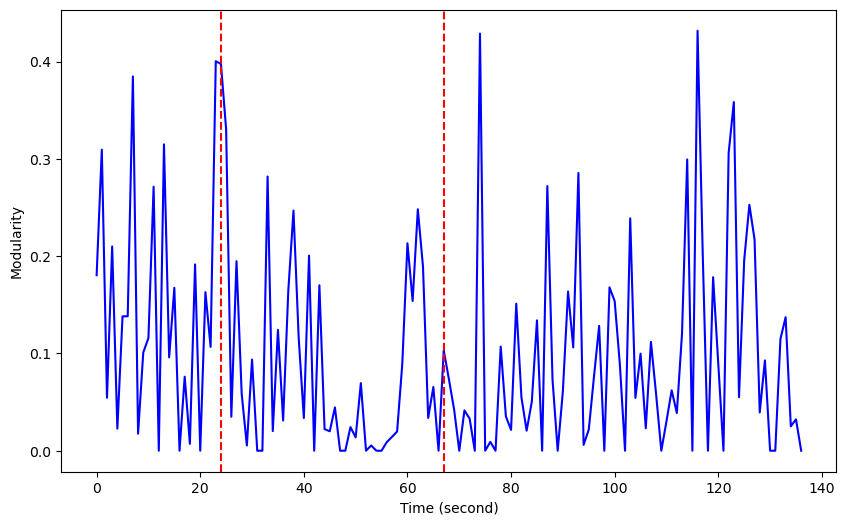

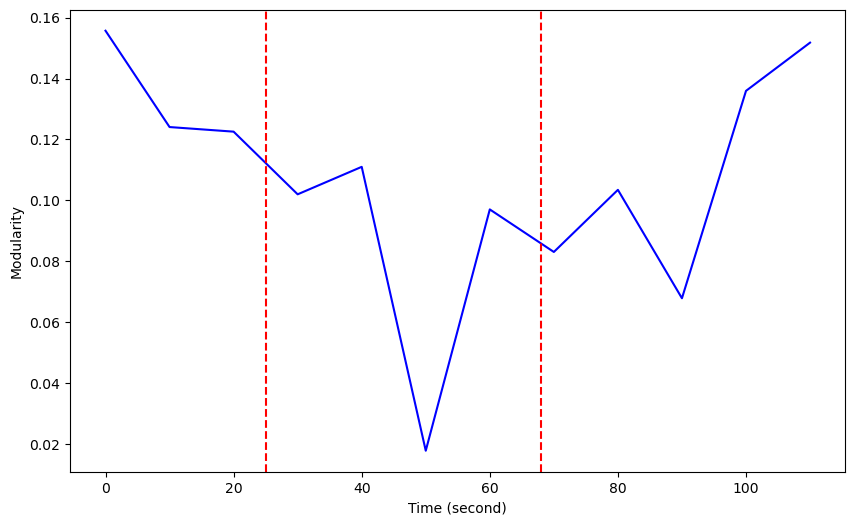

In [101]:
# Concatenate the segments
modularity_combined = np.concatenate((modularity_background_array[:background_end_1+1], modularity_seizure_array, modularity_background_array[background_end_1+2:]))

length = len(modularity_combined)
x_values = list(range(0, length, 1))
plt.figure(figsize=(10, 6))
plt.plot(x_values[:length], modularity_combined, color='blue')
plt.axvline(x=seizure_start-1, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=seizure_end-1, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Modularity')
plt.show()

reshaped_array = modularity_background_array[:len(modularity_background_array)//10*10].reshape(-1, 10)
averaged_modularity_background_array = reshaped_array.mean(axis=1)

reshaped_array = modularity_seizure_array[:len(modularity_seizure_array)//10*10].reshape(-1, 10)
averaged_modularity_seizure_array = reshaped_array.mean(axis=1)

# Concatenate the segments
modularity_combined2 = np.concatenate((averaged_modularity_background_array[:background_end_1//10+1], averaged_modularity_seizure_array, averaged_modularity_background_array[background_end_1//10+2:]))

plt.close('all')
length = len(modularity_combined2)
x_values = list(range(0, length*10, 10))
plt.figure(figsize=(10, 6))
plt.plot(x_values, modularity_combined2, color='blue')
plt.axvline(x=seizure_start, color='red', linestyle='--', label='Seizure Start')  # Adjusted for the new x-values
plt.axvline(x=seizure_end, color='red', linestyle='--', label='Seizure End')    # Adjusted for the new x-values
plt.xlabel('Time (second)')
plt.ylabel('Modularity')
plt.show()

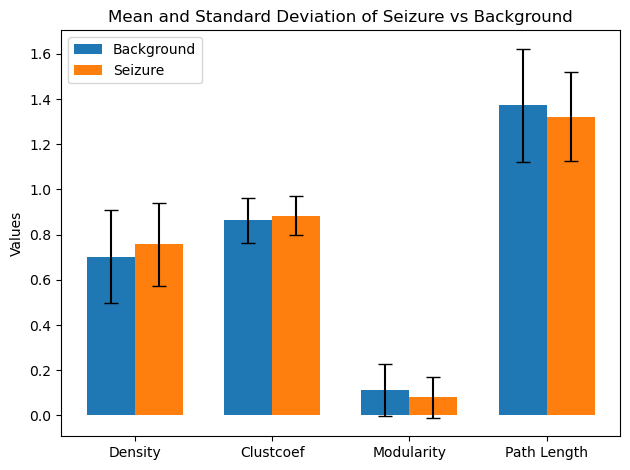

In [102]:
# Data for plotting
categories = ['Density', 'Clustcoef', 'Modularity', 'Path Length']
mean_seizure = [mean_density_seizure, mean_clustcoef_seizure, mean_modularity_seizure, mean_path_seizure]
std_seizure = [std_density_seizure, std_clustcoef_seizure, std_modularity_seizure, std_path_seizure]
mean_background = [mean_density_background, mean_clustcoef_background, mean_modularity_background, mean_path_background]
std_background = [std_density_background, std_clustcoef_background, std_modularity_background, std_path_background]

# Create bar plot
x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
# bars_seizure = ax.bar(x - width/2, mean_seizure, width, yerr=std_seizure, label='Seizure', capsize=5)
# bars_background = ax.bar(x + width/2, mean_background, width, yerr=std_background, label='Background', capsize=5)
bars_background = ax.bar(x - width/2, mean_background, width, yerr=std_background, label='Background', capsize=5)
bars_seizure = ax.bar(x + width/2, mean_seizure, width, yerr=std_seizure, label='Seizure', capsize=5)

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Values')
ax.set_title('Mean and Standard Deviation of Seizure vs Background')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [105]:
print(f"{mean_density_background:.4f} + {std_density_background:.4f}")

0.7031 + 0.2046


In [106]:
print(f"{mean_density_seizure:.4f} + {std_density_seizure:.4f}")

0.7573 + 0.1824
